# Visualizing Data with Titanic DataSet 

Before we start getting our hands dirty with the python and csv files, we first understand what is present in the dataset.

The dataset consists of the following columns:
1. PassengerId
2. Survived
3. Pclass
4. Name
5. Sex 
6. Age
7. SibSp
8. Parch
9. Ticket
10. Fare
11. Cabin
12. Embarked

<a id="top"></a> 
### Procedure followed throughout the project
1. [Importing Packages](#import)
2. [Data Inspection](#inspect)
    - [Dataset at a glance](#2.1)
    - [Columns at a glance](#2.2)
    - [To check whether data contains any null values](#2.3)
3. [Data Cleaning](#dcl)
    - [Dropping data column](#3.1)
    - [Populating the missing ages](#3.2)
    - [Missing embarkation ports](#3.3)
4. [Data Visualization](#visual)
    - [Scatter plot of Fare versus Age](#4.1)
    - [Bar Graph to represent the Seat Class taken by passengers](#4.2)
    - [Histogram to represent Age](#4.3)
    - [Bar plot of the Survival Rate of People](#4.4)
    - [Heat Map of Survial vs PClass](#4.5)
    - [Cool way to represent Age, Survival and Pclass](#4.6)
    - [Violin plot of Gender versus Age](#4.7)
    - [Bar plot of Embarkment vs Count keeping Pclass into consideration](#4.8)
6. [Sugestion](#suggest)

<a id="import"></a>
## <u>1. Importing Python Packages</u>

Importing the required python packages for the project

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id="inspect"></a>
## <u>2. Data inspection</u>

We perform the initial inspection by importing the required .csv file into the Jupyter notebook, looking into the file as we are not expected to remember all the details of the present in the file

<a id="2.1"></a>
### 2.1 Dataset at a glance

In [4]:
#reading and refering the data using the variable `data`
data = pd.read_csv("Titanic-DataSet.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<a id="2.2"></a>
### 2.2 Columns at a glance

`variable.dtypes` prints the columns of the dataset along with the datatype in a tabular manner

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<a id="2.3"></a>
### 2.3 To check whether data contains any null values

This step is crucial during the inspection stage, as this gives the analyst a rough idea of the number of data cells that needs to be filled with calculated values

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Conclusion 

As we can see from the given table, columns like Age, Cabin and Embarked consists of null value which shall be either filled or dropped during the Data Cleaning Process.<br>

<a id="dcl"></a>
## <u>3. Data Cleaning</u>

One has to clean the data i.e., remove any null values and ambiguities (if any), and try to achieve uniformity in the dataset.

<a id="3.1"></a>
### 3.1 Dropping data column

Out of the 891 data entries, 687 data cells are empty in the dataset, so we can safely drop the column as it doesn't prove handy for us.

In [7]:
# By using the parameter inplace, we are indicating that this change shall be made permanent in our dataset. 
# Which by default is false 
data.drop('Cabin', axis=1, inplace=True)

We now print the columns of the dataset to check if `'cabin'` is dropped or not.

In [8]:
for i in data.columns:
    print(i)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Embarked


<a id="3.2"></a>
### 3.2 Populating the missing ages

Here I plan to clean the data by filling in the **mean value of the age** in cell which have a NULL value

In [9]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

<a id="3.3"></a>
### 3.3 Missing embarkation ports

We notice that the `Embarked` column contains some missing value. So we first find out the null entries

In [10]:
# data['Embarked'].isnull().sum()    { to check number of data entries with null value, turns out to be 2 }
missingports = data[data['Embarked'].isnull()]
missingports

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


We notice that both passengers were travelling with the same ticket number. And we would be filling the `Embarked` column with the mode of the column. For that, we will have to find the mode.

In [11]:
table = pd.crosstab(data['Embarked'],data['Sex'])
print(table)

Sex       female  male
Embarked              
C             73    95
Q             36    41
S            203   441


From the above table we conclude that most women we travelling to **Southampton**. Hence we will be filling the NaN with S in both cases. And then recheck the null status of the Embarked column using `isnull().sum()`

In [12]:
data['Embarked'].fillna('S',inplace=True)

In [13]:
data['Embarked'].isnull().sum()

0

<a id="visual"></a> 
## <u>4. Data Visualization </u>

This section of the project consists of basic visualization of the dataset. The purpose of this section is for the better understanding of the dataset in a more clearer and visual manner.

<a id="4.1"></a>
### 4.1 Scatter plot of Fare versus Age

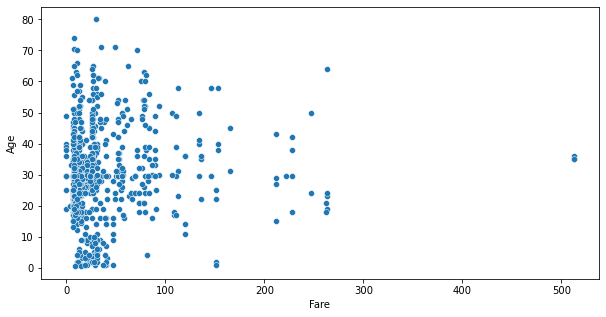

In [14]:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x="Fare", y="Age", data=data, ax=ax); 

<a id="4.2"></a>
### 4.2 Bar Graph to represent the Seat Class taken by passengers

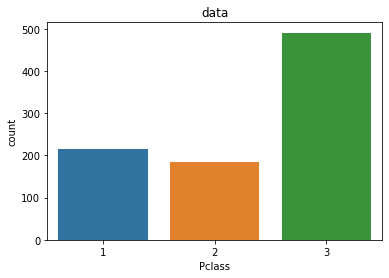

In [15]:
ax = sns.countplot(x="Pclass", data=data)
ax.set_title('data');

<a id="4.3"></a>
### 4.3 Histogram to represent Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

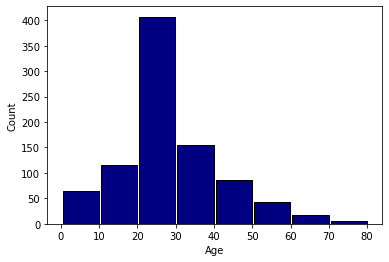

In [17]:
sns.histplot(data['Age'], bins=25, 
             color = 'navy', alpha = 1, 
             binwidth=10, shrink=.95)

<a id="4.4"></a>
### 4.4 Bar plot of the Survival Rate of People

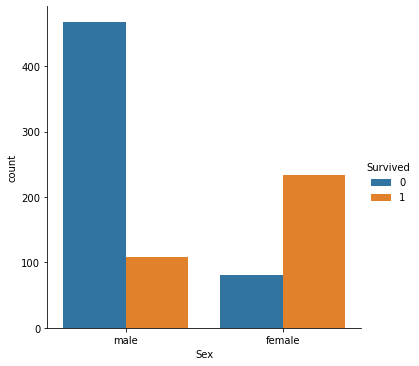

In [18]:
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = data)

<a id="4.5"></a>
### 4.5 Heat Map of Survial vs PClass

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

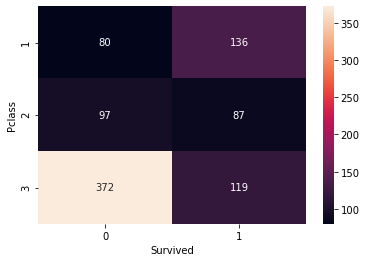

In [19]:
# Group the dataset by Pclass and Survived and then unstack them
group = data.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()

# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

<a id="4.6"></a>
### 4.6 Cool way to represent Age, Survival and Pclass

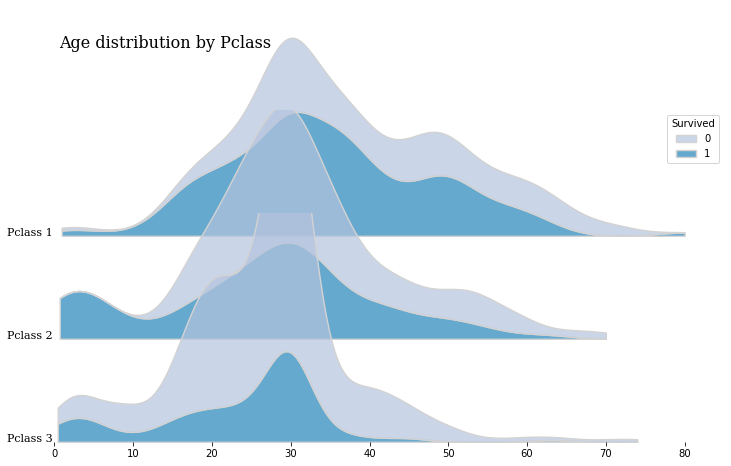

In [20]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(3), sorted(data['Pclass'].unique()), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))
    
    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Age', data=data[data['Pclass']==cls], 
                fill=True, ax=axes[idx], cut=0, bw_method=0.25, 
                lw=1.4, edgecolor='lightgray', hue='Survived', 
                multiple="stack", palette='PuBu', alpha=0.7
               ) 
    
    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 85)
    
    axes[idx].set_yticks([])
    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)
        
    axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Pclass {cls}',fontweight="light", fontfamily='serif', fontsize=11,ha="right")
    if idx != 1 : axes[idx].get_legend().remove()
        
fig.text(0.13,0.81,"Age distribution by Pclass", fontfamily='serif', fontsize=16)

plt.show() 

<a id="4.7"></a>
### 4.7 Violin plot of Gender versus Age

<AxesSubplot:xlabel='Sex', ylabel='Age'>

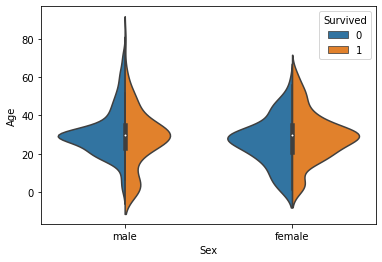

In [21]:
# Violinplot Displays distribution of data across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", data = data, split = True)

This graph summarises age range of people who were saved. The survival rate is –  

- Good for children.
- High for women in the age range 20-50.
- Less for men as the age increases.

<a id="4.8"></a>
### 4.8 Count plot of Embarkment vs Count keeping Pclass into consideration

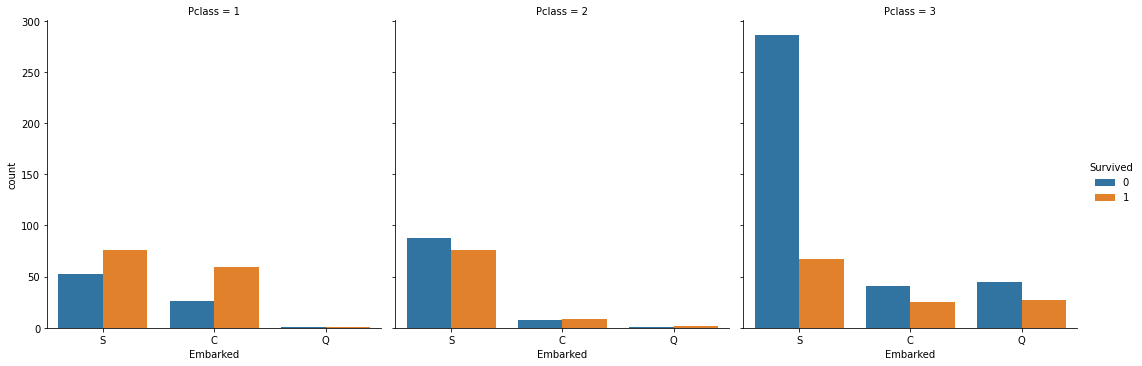

In [22]:
sns.catplot(x ='Embarked', hue ='Survived',
            kind ='count', col ='Pclass', 
            data = data)

<a id="suggest"></a>
### Suggestion
As with most datasets the more information we have the better it can be analysed. I believe that we could add the following variables:
- life boat number - the reason why there were so many fatalities on board the Titanic was due to there not been enough lifeboats. I believe that if we knew the lifeboat number and the capacity of a lifeboat we could determine if it was possible for more people to survive

[Back to Top](#top)